# Homework 8: Confidence Intervals

**Reading**: 
* [Estimation](https://www.inferentialthinking.com/chapters/13/Estimation.html)

Please complete this notebook by filling in the cells provided. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. For all problems that you must write out explanations, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! 

In [5]:
# Don't change this cell; just run it.   

import numpy as np
import random as rand
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Election Polls


During the 2020 election for U.S. Senate representing North Carolina, pollsters asked likely voters if they had voted for Cal Cunningham or Thom Tillis. If they had not, the likely voters were then asked  if the election for U.S. Senate representing North Carolina were held today, would you vote for Cal Cunningham or Thom Tillis? The results of the survey for the 660 participants is shown below:

|Responses  | Percentage|
|:------------:|:------------:|
|Cal Cunningham | 46% |
|Thom Tillis | 42% |
|Some other candidate | 5% |
|Not sure / Prefer not to answer | 7% |

We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each response will receive from the entire population (the entire population is all NC voters). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `poll` contains the results of the survey.

In [6]:
# Just run this cell
poll = Table.read_table('../Datasets/poll.csv')
poll.group('Response')

Response,count
Cal Cunningham,304
Not sure / Prefer not to answer,46
Some other candidate,33
Thom Tillis,277


In [33]:
per = poll.group("Response")
values = (per.column("count")/per.column("count").sum())*100
per_tbl = per.drop("count").with_column("Response Percentage", values)
per_tbl

Response,Response Percentage
Cal Cunningham,46.0606
Not sure / Prefer not to answer,6.9697
Some other candidate,5
Thom Tillis,41.9697


**Question 1.** Complete the function `one_resampled_percentage` below. It should return Cal Cunningham's **percentage** of votes after simulating one bootstrap sample of `tbl`.

**Note:** `tbl` will always be in the same format as `poll`.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [54]:
our_sample = poll.sample(100, with_replacement=False)
grouped_sample = our_sample.group("Response")
values = (grouped_sample.column("count")/grouped_sample.column("count").sum())*100
grouped_sample_perc = grouped_sample.drop("count").with_column("Response Percentage", values)
Cal_percent = grouped_sample_perc[1][0]
print("Cal Cunningham's Percentage = ", Cal_percent, "%")

Cal Cunningham's Percentage =  42.0 %


In [61]:
def one_resampled_percentage(tbl):
    our_sample = tbl.sample(100, with_replacement=False)
    grouped_sample = our_sample.group("Response")
    values = (grouped_sample.column("count")/grouped_sample.column("count").sum())*100
    grouped_sample_perc = grouped_sample.drop("count").with_column("Response Percentage", values)
    Cal_percent = grouped_sample_perc[1][0]
    return Cal_percent

one_resampled_percentage(poll)

45.0

**Question 2.** Complete the `percentages_in_resamples` function such that it returns an array of 2500 bootstrapped estimates of the percentage of voters who will vote for Cal Cunningham. You should use the `one_resampled_percentage` function you wrote above.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [65]:
# percentage_Cal = []

# for x in np.arange(0,2500, 1):
#     percentage_Cal.append(one_resampled_percentage(poll))
    
# percentage_Cal

In [67]:
def percentages_in_resamples():
    percentage_Cal = []
    for x in np.arange(0,2500, 1):
        percentage_Cal.append(one_resampled_percentage(poll))
    return percentage_Cal
        
percentages_in_resamples()

[42.0,
 49.0,
 56.00000000000001,
 52.0,
 47.0,
 47.0,
 49.0,
 53.0,
 41.0,
 39.0,
 50.0,
 54.0,
 47.0,
 42.0,
 51.0,
 46.0,
 47.0,
 48.0,
 41.0,
 42.0,
 46.0,
 48.0,
 51.0,
 49.0,
 45.0,
 44.0,
 51.0,
 52.0,
 51.0,
 55.00000000000001,
 46.0,
 45.0,
 49.0,
 40.0,
 42.0,
 44.0,
 42.0,
 37.0,
 43.0,
 39.0,
 39.0,
 48.0,
 47.0,
 51.0,
 43.0,
 47.0,
 44.0,
 45.0,
 39.0,
 46.0,
 48.0,
 45.0,
 53.0,
 47.0,
 40.0,
 40.0,
 43.0,
 35.0,
 42.0,
 36.0,
 49.0,
 47.0,
 50.0,
 44.0,
 47.0,
 47.0,
 32.0,
 52.0,
 51.0,
 49.0,
 53.0,
 45.0,
 48.0,
 43.0,
 44.0,
 51.0,
 47.0,
 49.0,
 45.0,
 48.0,
 47.0,
 47.0,
 46.0,
 51.0,
 49.0,
 53.0,
 42.0,
 47.0,
 49.0,
 45.0,
 42.0,
 39.0,
 51.0,
 51.0,
 54.0,
 39.0,
 45.0,
 46.0,
 43.0,
 45.0,
 39.0,
 46.0,
 53.0,
 35.0,
 37.0,
 54.0,
 44.0,
 45.0,
 40.0,
 40.0,
 49.0,
 46.0,
 45.0,
 41.0,
 50.0,
 50.0,
 45.0,
 50.0,
 41.0,
 41.0,
 43.0,
 50.0,
 48.0,
 41.0,
 51.0,
 50.0,
 41.0,
 43.0,
 48.0,
 48.0,
 44.0,
 42.0,
 49.0,
 51.0,
 40.0,
 46.0,
 53.0,
 44.0,
 50.0,
 

In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2,500 bootstrap estimates of the percentage of voters who voted for Cal Cunningham. Based on what the original election poll percentages were, does the graph seem reasonable? 

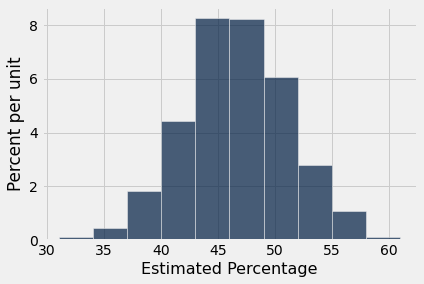

In [68]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

**Question 3.** Using the array `resampled_percentages`, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. (Compute the lower and upper ends of the interval, named `Cal_lower_bound` and `Cal_upper_bound`, respectively.)

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [72]:
Cal_lower_bound = percentile(2.5, resampled_percentages)
Cal_upper_bound = percentile(97.5, resampled_percentages)
print("Bootstrapped 95% confidence interval for the percentage of Cal Cunningham voters in the population: [{:f}, {:f}]".format(Cal_lower_bound, Cal_upper_bound))

Bootstrapped 95% confidence interval for the percentage of Cal Cunningham voters in the population: [37.000000, 55.000000]


**Question 4.** The survey results do not seem to indicate that Cal Cunningham is beating all of the other candidates or responses combined. We would like to use confidence intervals to determine a range of likely values for Cal Cunninghams's true lead over all the other candidates or responses combined. 

Define the function `one_resampled_difference` that returns **exactly one value** of Cal Cunningham's percentage lead over Thom Tillis, Some other candidate, and Not sure / Prefer not to answer combined from one bootstrap sample of `tbl`.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [104]:
# our_sample = poll.sample(100, with_replacement=False)
# grouped_sample = our_sample.group("Response")
# values = (grouped_sample.column("count")/grouped_sample.column("count").sum())*100
# grouped_sample_perc = grouped_sample.drop("count").with_column("Response Percentage", values)
# grouped_sample_perc
# everyone_else_perc = grouped_sample_perc.column("Response Percentage").sum() - grouped_sample_perc.column("Response Percentage")[0]
# Cal_percentage = grouped_sample_perc.column("Response Percentage")[0]

# # Want just Cal's percentage/Everyone else's percentage
# cal_over_others = Cal_percentage/everyone_else_perc
# cal_over_others

0.8867924528301887

In [106]:
def one_resampled_difference(tbl):
    our_sample = tbl.sample(100, with_replacement=False)
    grouped_sample = our_sample.group("Response")
    values = (grouped_sample.column("count")/grouped_sample.column("count").sum())*100
    grouped_sample_perc = grouped_sample.drop("count").with_column("Response Percentage", values)
    everyone_else_perc = grouped_sample_perc.column("Response Percentage").sum() - grouped_sample_perc.column("Response Percentage")[0]
    Cal_percentage = grouped_sample_perc.column("Response Percentage")[0]

    # Want just Cal's percentage/Everyone else's percentage
    cal_over_others = Cal_percentage/everyone_else_perc
    return cal_over_others

one_resampled_difference(poll)

0.639344262295082

**Question 5.**
Write a function called `leads_in_resamples` that finds 2,500 bootstrapped estimates (the result of calling `one_resampled_difference`) of Cal Cunninghams's lead over the other responses combined. Plot a histogram of the resulting samples. 

**Note:** Cal Cunningham's lead can be negative.

<!--
BEGIN QUESTION
name: q1_5
manual: true
-->
<!-- EXPORT TO PDF -->

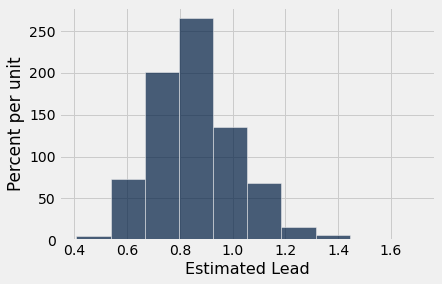

In [107]:
def leads_in_resamples():
    percentage_Cal = []
    for x in np.arange(0, 2500, 1):
        percentage_Cal.append(one_resampled_difference(poll))
    return percentage_Cal

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

**Question 6.** Use the simulated data from Question 5 to compute an approximate 95% confidence interval for Cal Cunningham's true lead over the other responses combined.

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [108]:
diff_lower_bound = percentile(2.5, sampled_leads)
diff_upper_bound = percentile(97.5, sampled_leads)
print("Bootstrapped 95% confidence interval for Cal Cunningham's true lead over the other responses combined: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Cal Cunningham's true lead over the other responses combined: [0.587302, 1.222222]


## 2. Interpreting Confidence Intervals


Dr. McLean computed the following 95% confidence interval for the percentage of Cal Cunningham voters: 

$$[42.3, 49.8]$$

(Your answer may have been a bit different; that doesn't mean it was wrong!)

#### Question 1
Can we say there is a 95% probability that the interval [42.3, 49.8] contains the true percentage of the population that votes for Cal Cunningham for US Senate in North Carolina? Answer "yes" or "no" and explain your reasoning. 

*Note:* ambiguous answers using language like "sometimes" or "maybe" will not receive credit.

<!--
BEGIN QUESTION
name: q2_1
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

#### Question 2

Dr. McLean also created 70%, 90%, and 99% confidence intervals from the same sample, but he forgot to label which confidence interval represented which percentages! Match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below (e.g. __ % CI: [49.87, 54.0] $\rightarrow$ replace the blank with one of the three confidence levels). **Then**, explain your thought process and how you came up with your answers.

The intervals are below:

* [42.9, 49.2]
* [41.2, 50.9]
* [44.1, 48.2]

<!--
BEGIN QUESTION
name: q2_2
manual: true
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

### Question 3
Suppose that we produced 1,200 new samples (each one a uniform random sample of 660 likely voters in North Carolina) from the population and created a 90% confidence interval from each one. Roughly how many of those 1,200 intervals do you expect will actually contain the true percentage of the population?

Assign your answer to `true_percentage_intervals`.

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [ ]:
true_percentage_intervals = ...
true_percentage_intervals

Recall the second bootstrap confidence interval you created, which estimated Cal Cunningham's lead over the other candidates and responses combined. Dr. McLean's 99% confidence interval for the true lead (in the population of all voters) was

$$[-17.2, 2.2]$$

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Cal Cunningham tied with the percentage of votes for the remaining candidates and responses combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Cal Cunningham's lead is exactly 0. Our alternative hypothesis is that Cal Cunningham's lead is not equal to 0.  In the questions below, don't compute any confidence interval yourself - use only Dr. McLean's 99% confidence interval.


**Question 4** 

Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using our staff confidence interval?

Assign `responses_tied` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Dr. McLean's confidence interval

*Hint:* If you're confused, take a look at [this chapter](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.

<!--
BEGIN QUESTION
name: q2_4
manual: false
-->

In [ ]:
responses_tied = ...

#### Question 5
What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using Dr. McLean's confidence interval?

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Dr. McLean's confidence interval

<!--
BEGIN QUESTION
name: q2_5
manual: false
-->

In [ ]:
cutoff_one_percent = ...

#### Question 6
What if we use a P-value cutoff of 0.1%? Do we reject, fail to reject, or are we unable to tell using our confidence interval?

Assign `cutoff_one_tenth_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis
2. Fail to reject the null / Data is consistent with the null hypothesis
3. Unable to tell using Dr. McLean's confidence interval

<!--
BEGIN QUESTION
name: q2_6
manual: false
-->

In [6]:
cutoff_one_tenth_percent = ...